# CD-HIT Protein Sequence Clustering Analysis

This notebook demonstrates protein sequence clustering using CD-HIT at various identity thresholds.

CD-HIT is a widely used program for clustering and comparing protein or nucleotide sequences.


## Workflow

1. Clone and build CD-HIT
2. Run clustering at different identity thresholds (40%, 50%, 60%, 70%)
3. Analyze cluster distribution
4. Visualize results


## part a) cloning the git


In [13]:
!git clone https://github.com/weizhongli/cdhit


fatal: destination path 'cdhit' already exists and is not an empty directory.


In [15]:
%cd cdhit
!make zlib=no


/content/cdhit
,make: Nothing to be done for 'all'.


## part b)

base on the pdf thresholds are 2 for 40%-50% , 3 for 50%-60% , 4 for 60%-70% and 5 for 70%-100%

In [20]:
!./cd-hit -i /content/ex1.fasta -o /content/ex1_cluster40.fasta -c 0.4 -n 2
!./cd-hit -i /content/ex1.fasta -o /content/ex1_cluster50.fasta -c 0.5 -n 3
!./cd-hit -i /content/ex1.fasta -o /content/ex1_cluster60.fasta -c 0.6 -n 4
!./cd-hit -i /content/ex1.fasta -o /content/ex1_cluster70.fasta -c 0.7 -n 5


,Program: CD-HIT, V4.8.1 (+OpenMP), Dec 16 2025, 16:58:05
,Command: ./cd-hit -i /content/ex1.fasta -o
,         /content/ex1_cluster40.fasta -c 0.4 -n 2
,
,Started: Tue Dec 16 17:23:21 2025
,================================================================
,                            Output                              
,----------------------------------------------------------------
,total seq: 172
,longest and shortest : 734 and 97
,Total letters: 73019
,Sequences have been sorted
,
,Approximated minimal memory consumption:
,Sequence        : 0M
,Buffer          : 1 X 10M = 10M
,Table           : 1 X 0M = 0M
,Miscellaneous   : 0M
,Total           : 10M
,
,Table limit with the given memory limit:
,Max number of representatives: 1370848
,Max number of word counting entries: 98655532
,
comparing sequences from          0  to        172
,
,      172  finished         54  clusters
,
,Approximated maximum memory consumption: 10M
,writing new database
,writing clustering information
,progr

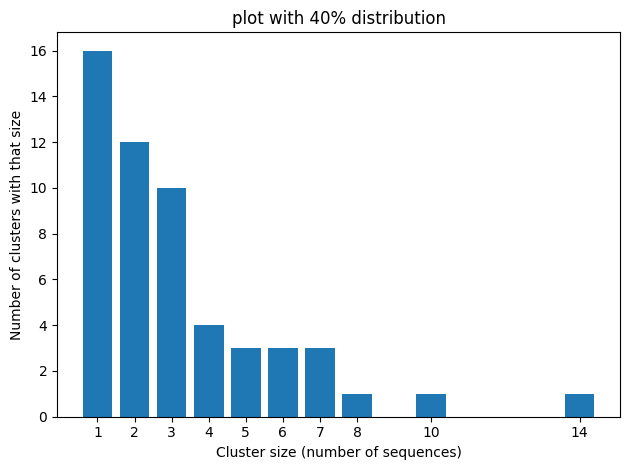

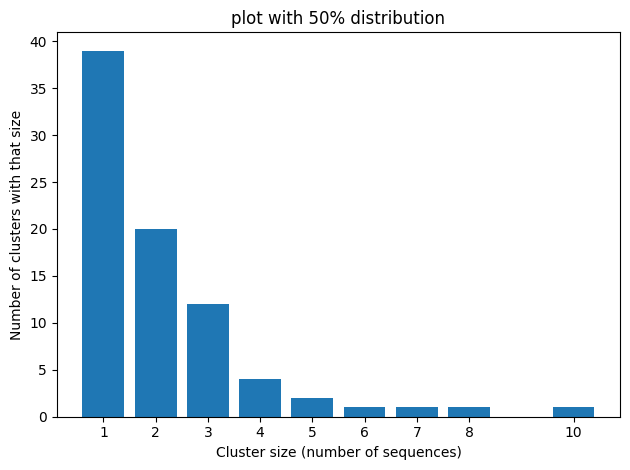

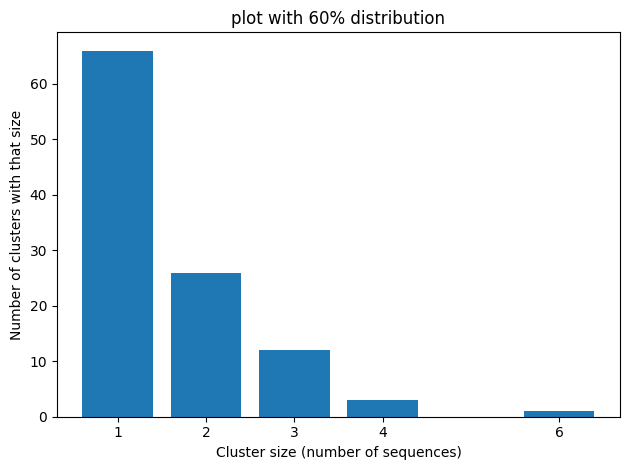

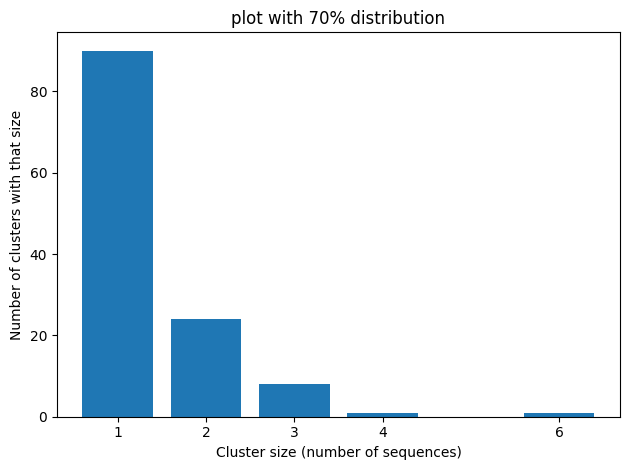

In [28]:
from collections import Counter
import matplotlib.pyplot as plt

def cluster_size_counts(clstr_path: str) -> Counter:
    sizes = []
    current = 0
    with open(clstr_path, "r") as f:
        for line in f:
            line = line.strip()
            if line.startswith(">Cluster"):
                if current > 0:
                    sizes.append(current)
                current = 0
            elif line:
                current += 1
    if current > 0:
        sizes.append(current)
    return Counter(sizes)

def bar_plot(x,y,title,fig_loc):
  plt.figure()
  plt.bar(x, y)
  plt.xlabel("Cluster size (number of sequences)")
  plt.ylabel("Number of clusters with that size")
  plt.title(title)
  plt.xticks(x)
  plt.tight_layout()
  plt.savefig(fig_loc, dpi=200)
  plt.show()

def create_bar_plot(clstr_path, title, fig_loc):
    counts = cluster_size_counts(clstr_path)
    x = sorted(counts.keys())
    y = [counts[k] for k in x]
    bar_plot(x, y,title, fig_loc)

create_bar_plot( "/content/ex1_cluster40.fasta.clstr", "plot with 40% distribution","/content/ex1_cluster40_barplot.png")
create_bar_plot( "/content/ex1_cluster50.fasta.clstr", "plot with 50% distribution","/content/ex1_cluster50_barplot.png")
create_bar_plot( "/content/ex1_cluster60.fasta.clstr", "plot with 60% distribution","/content/ex1_cluster60_barplot.png")
create_bar_plot( "/content/ex1_cluster70.fasta.clstr", "plot with 70% distribution","/content/ex1_cluster70_barplot.png")

